- 특정 이슈에 대해 외부의 반응을 살펴보기 위해 개발
- 부정확성으로 인해 실제 사용은 거의 하지 않음
- 블로그 글에는 '특정 이슈 키워드'보다 과련되지 않은 내용이 훨씬 많아서 유용하다고 보기 어려웠음

In [2]:
import requests

response = requests.get('https://www.naver.com') # 웹사이트에 리퀘스트를 보냄. 리퀘스트의 결과가 response에 저장

print(response)
print(response.status_code) # 응답 코드 보여주기 200이면 성공!
print(response.text) # 응답 결과를 텍스트로 보여줌.

<Response [200]>
200
<!doctype html>
















<html lang="ko">
<head>
<meta charset="utf-8">
<meta name="Referrer" content="origin">
<meta http-equiv="Content-Script-Type" content="text/javascript">
<meta http-equiv="Content-Style-Type" content="text/css">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=1100">
<meta name="apple-mobile-web-app-title" content="NAVER" />
<meta name="robots" content="index,nofollow"/>
<meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/>
<meta property="og:title" content="네이버">
<meta property="og:url" content="https://www.naver.com/">
<meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png">
<meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/>
<meta name="twitter:card" content="summary">
<meta name="twitter:title" content="">
<meta name="twitter:url" content="https://www.naver.com/">
<meta name="twitter:image" 

In [4]:
html_doc="""
<html>
    <head>
    </head>
        <body>
            <p> hello </p>
            <p> good day </p>
        </body>
</html>
"""

from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser') # <- html_doc은 파싱할 문서고, 'html.parser'는 파싱 방식이에요.


for p in soup.find('p'):
    print(p)

 hello 


In [6]:
soup = BeautifulSoup(html_doc, 'html.parser') # <- html_doc은 파싱할 문서고, 'html.parser'는 파싱 방식이에요.


for p in soup.find_all('p'):
    print(p)

<p> hello </p>
<p> good day </p>


In [4]:
import csv
import requests
import time
from bs4 import BeautifulSoup


def blog_crawling(page=1):
    url = r"https://search.naver.com/search.naver?date_from=&date_option=0&date_to=&dup_remove=1&nso=&post_blogurl=&post_blogurl_without=&query=이케아+기흥+팝업&sm=tab_pge&srchby=all&st=sim&where=post&start={}".format(page)

    response = requests.get(url)

    soup = BeautifulSoup(response.text, 'html.parser')

    blog_post_list = []

    for links in soup.select('li.sh_blog_top > dl'):
        title = links.select('dt > a')
        content = links.select('dd.sh_blog_passage')
        author = links.select('dd.txt_block a')

        title = title[0].get('title')

        content = content[0].text

        author = author[0].text

        blog_post = {'author': author, 'title': title, 'content': content}

        blog_post_list.append(blog_post)

    return blog_post_list

def save_data(blog_post):
    keys = blog_post[0].keys()
    with open('blog_crawling.csv', 'w') as file:
        writer = csv.DictWriter(file, keys)
        writer.writeheader()
        writer.writerows(blog_post)

blog_post_list = []
for i in range(1, 390, 10):
    blog_post_list.extend( blog_crawling(page=i) )
    time.sleep(2)

#save_data(blog_post_list)

In [5]:
import pandas as pd
pd.DataFrame(blog_post_list).to_csv('blog_crawling2.csv', encoding='utf-8-sig')

___

In [107]:
def blog_crawling(page=1):
    url = r"https://search.naver.com/search.naver?date_from=&date_option=0&date_to=&dup_remove=1&nso=&post_blogurl=&post_blogurl_without=&query=이케아+부산+팝업&sm=tab_pge&srchby=all&st=sim&where=post&start={}".format(page)

    response = requests.get(url)

    soup = BeautifulSoup(response.text, 'html.parser')

    blog_postings = []
    n=1
    for links in soup.select('li.sh_blog_top > dl'):
        
        link = links.select('dt > a')[0].get('href')
        try:
            driver.get(link)
            driver.switch_to.frame(driver.find_elements_by_tag_name("iframe")[0])
            bss = BeautifulSoup(driver.page_source, 'html.parser')
            tmp = bss.select('[class = se-main-container]')[0].text.replace("\n", "").replace("\u200b", "")
            blog_postings.append(tmp)
            print('success:{p}-{n}'.format(p=page,n=n))
        except:
            pass
        n += 1

    return blog_postings

In [108]:
driver = webdriver.Chrome("chromedriver.exe")
postings = []
for i in range(1, 390, 10):
    postings.extend(blog_crawling(page=i))
    print(i)
    time.sleep(2)

success:1-1
success:1-2
success:1-3
success:1-6
success:1-7
success:1-8
success:1-9
success:1-10
1
success:11-1
success:11-3
success:11-4
success:11-5
success:11-6
success:11-7
success:11-8
success:11-9
11
success:21-1
success:21-3
success:21-4
success:21-5
success:21-6
success:21-8
success:21-9
success:21-10
21
success:31-1
success:31-2
success:31-3
success:31-4
success:31-5
success:31-9
success:31-10
31
success:41-1
success:41-2
success:41-3
success:41-4
success:41-5
success:41-6
success:41-7
success:41-8
success:41-9
success:41-10
41
success:51-1
success:51-2
success:51-3
success:51-4
success:51-5
success:51-6
success:51-7
success:51-8
success:51-9
success:51-10
51
success:61-2
success:61-3
success:61-4
success:61-5
success:61-8
success:61-10
61
success:71-2
success:71-3
success:71-4
success:71-5
success:71-6
success:71-7
success:71-8
success:71-9
success:71-10
71
success:81-1
success:81-2
success:81-3
success:81-4
success:81-5
success:81-6
success:81-7
success:81-8
success:81-9
suc

In [128]:
pd.DataFrame(postings[:136]).to_csv('blog_crawling.csv', encoding='utf-8-sig')

In [129]:
text = ''
for i in postings[:136]:
    text = text+i+' '
text

'  서면에서 근무하는 덕분에부산 이케아 팝업 스토어를 점심시간에 설렁설렁 다녀올 수 있었다 🤓오픈은 12월 2일에 이미 한 상태고2020년 1월 23일까지 한다운영시간은 12:00pm ~ 10:00pm위치는... 삼보 겜랜드 맞은편 버거킹 2층..예전 캔텍이라고 공주 컨셉 룸카페 그 건물인데이제 어서오세요 공주님~^^ 은 사라지고어서오세요 이케아입니다~^^ 를 들을 수 있따.. *팝업스토어 주소*부산광역시 부산진구 서전로10번길 64   오픈 다음날에 방문한지라줄 서지 않고 바로 입장안에 사람 많았뜸 ㅜㅜ그리고 히터 빵빵해서 더움   짜잔! 2층 프론트 쪽으로 가면친절한 직원분께서 미션하라고 종이를 주신다(안 해도 상관 없음)2,3,4층 돌아다니면서 이케아 마스코트상어 인형 #블로하이 를 찾고 (5개)퀴즈 답을 기재하면 된다..퀴즈 답은 매우 쉬워서 누구나 풀 수 있고1번 문제에 쓰라고 줄자도 줌ㅋㅋㅋㅋ멍충하게 줄자는 왜 주시는거에여? 물음ㅜ1번 문제 답은 아래에...아무튼! 문제를 맞추고이케아 패밀리 신규 가입하면4층에서 오늘의 커피와 이케아 장바구니를 준다그리고 곧 생길 동부산 이케아 핫도그 무료 시식권까지!!참고로 이케아 패밀리 신규 가입은4층 벽면에 큐알코드 있으니까그냥 그거 링크 타고가서 가입하시길...(이케아 패밀리/이케아 홈페이지 이런식으로 다른 것 같았음! 엉뚱한거 가입하면 다시 하라거 함)   빠질 수 없는 해시태그 이벤트#이케아부산 #이케아 를 SNS에 업로드하면4층에서 미니 크뇔리그를 줌동전지갑 혹은 인형 악세사리로 쓰면 될 듯..나는 깜빡하고 못 받았다인스타에 올리긴 했는데... 기프트카드 받고싶어요^^   자 그럼 상어 찾기를 시작해볼까!!참고로 이케아 팝업 스토어 입니다.... 가구나 인테리어 구경이 주 목적입니다..혼자 방탈출 게임 입장한듯이 호잡고다님ㅜㅋㅋ참고로 상어 블로하이는 100cm 입니다🤗     이케아에서 팔고 있는 물건들이 요로코롬쇼룸처럼 전시되어 있읍니다제가 이케아는 중국 유학 시절에..자주 왔다리갔다리 했는데요..~

___

In [130]:
from konlpy.tag import Mecab
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Kkma


In [131]:
tagger = Kkma()
tokens = tagger.nouns(text)

print(tokens)

c:\users\chpar10\appdata\local\programs\python\python37\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['서면', '근무', '덕분', '부산', '팝업', '스토어', '점심', '점심시간', '시간', '수', '오픈', '12', '12월', '월', '2', '2일', '일', '상태', '2020', '2020년', '년', '1', '1월', '23', '23일', '운영', '운영시간', '00', '10', '위치', '삼', '삼보', '보', '겜', '겜랜드', '랜드', '맞은편', '버거킹', '2층', '층', '예', '예전', '전', '캔', '캔텍', '텍', '공주', '컨셉', '룸', '룸카페', '카페', '건물', '은', '를', '있따', '팝업스토어', '주소', '부산광역시', '광역', '광역시', '시', '부산진', '부산진구', '구', '전로', '전로10번길', '번', '길', '64', '다음날', '방문', '지라', '지라줄', '줄', '입장', '입장안', '안', '사람', '많았', '많았뜸', '뜸', '히터', '움', '잔', '프론트', '쪽', '친절', '직원', '미션', '미션하라', '하라', '종이', '상관', '3', '4', '4층', '마스코트', '마스코트상어', '상어', '인형', '로', '로하이', '하이', '5', '5개', '개', '퀴즈', '답', '기재', '누구', '1번', '문제', '고', '줄자', '멍', '멍충', '충', '거', '여', '물음', '물음ㅜ1번', 'ㅜ', '아래', '패밀리', '신규', '가입', '오늘', '커피', '장', '장바구니', '바구니', '동', '동부산', '핫도그', '무료', '시식권', '식권', '참고', '벽면', '큐', '큐알코드', '알', '코드', '그거', '링크', '홈페이지', '식', '함', '해시', '해시태그', '태그', '이벤트', '업', '업로드', '로드', '미니', '크뇔리그', '줌', '줌동전지갑', '동전', '지갑', '악세사리', '듯', 

In [132]:
from PIL import Image
import numpy as np

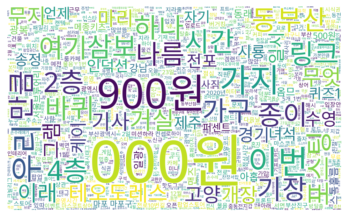

In [137]:
mask = np.array(Image.open('wordcloud/cloud.png'))

wordcloud = WordCloud(
    font_path=r'C:/Windows/Fonts/NotoIKEAKorean-Regular.ttf',
    background_color='white',
    max_words=2000,
    mask=mask
).generate(' '.join(tokens))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()